In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')#style change
%matplotlib inline
pd.options.mode.chained_assignment = None #ignore warnings
pd.options.display.float_format = '{:.4f}'.format #display in non-scientific notation

In [2]:
#**LEO these next two cells are for you:
#they should have all the code you need to run independently in your notebook

In [3]:
#LEO: This is for largest initial black percentage in 2010
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")
cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)

cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']
race_in2010 = race_pct[race_pct['Year']==2010]

most_black = cens_race[cens_race['Year']==2010][['Census Tract', 'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
most_black = list(most_black['Census Tract'].to_dict().values())
most_black;

In [4]:
#LEO: This is for black pct between 0.4 and 0.6 in 2010
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")
cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)

cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']
race_in2010 = race_pct[race_pct['Year']==2010]

#race_in2010.reset_index(inplace=True)
gent_18 = list(race_in2010[(race_in2010['Percent Black']<.6) & (race_in2010['Percent Black']>.4)]['Census Tract'].to_dict().values())
gent_18;

Text(0, 0.5, 'Percentage')

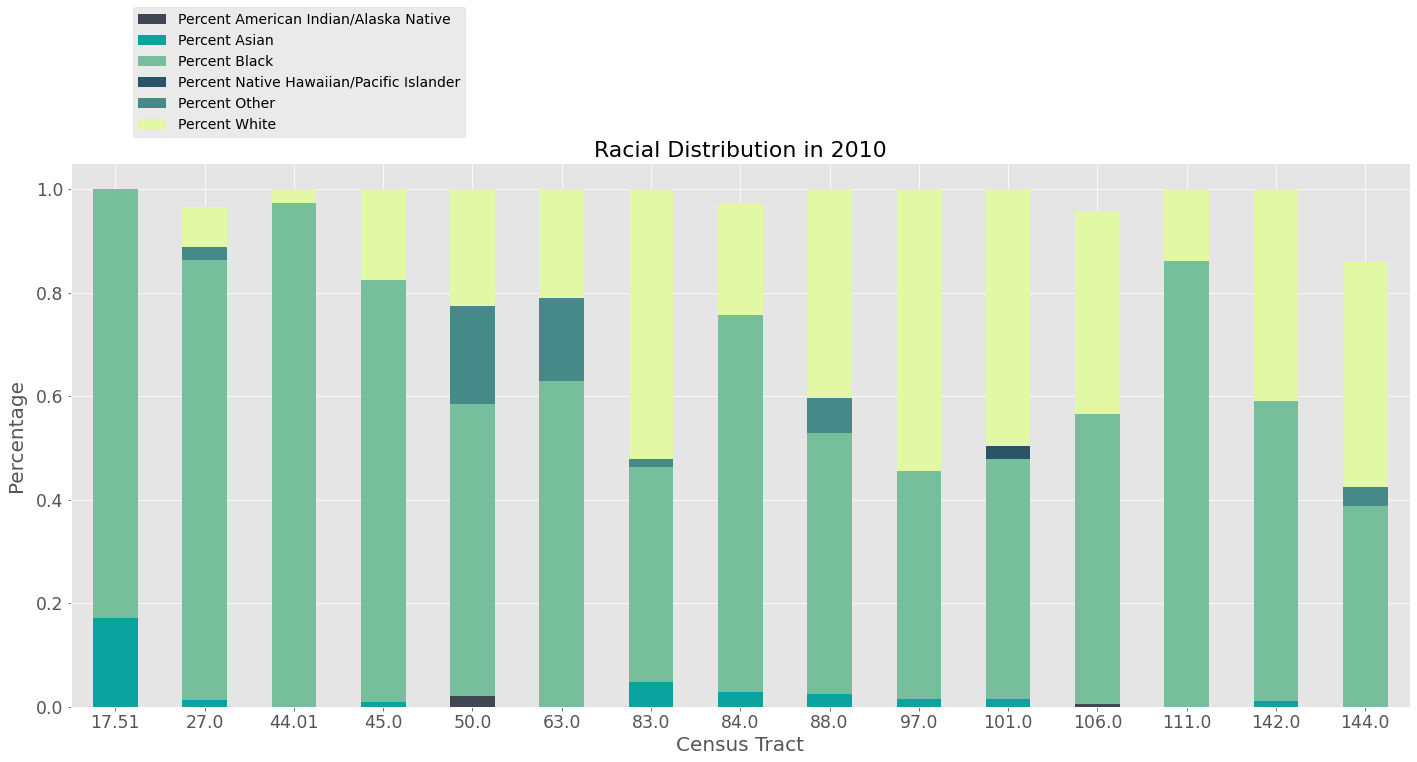

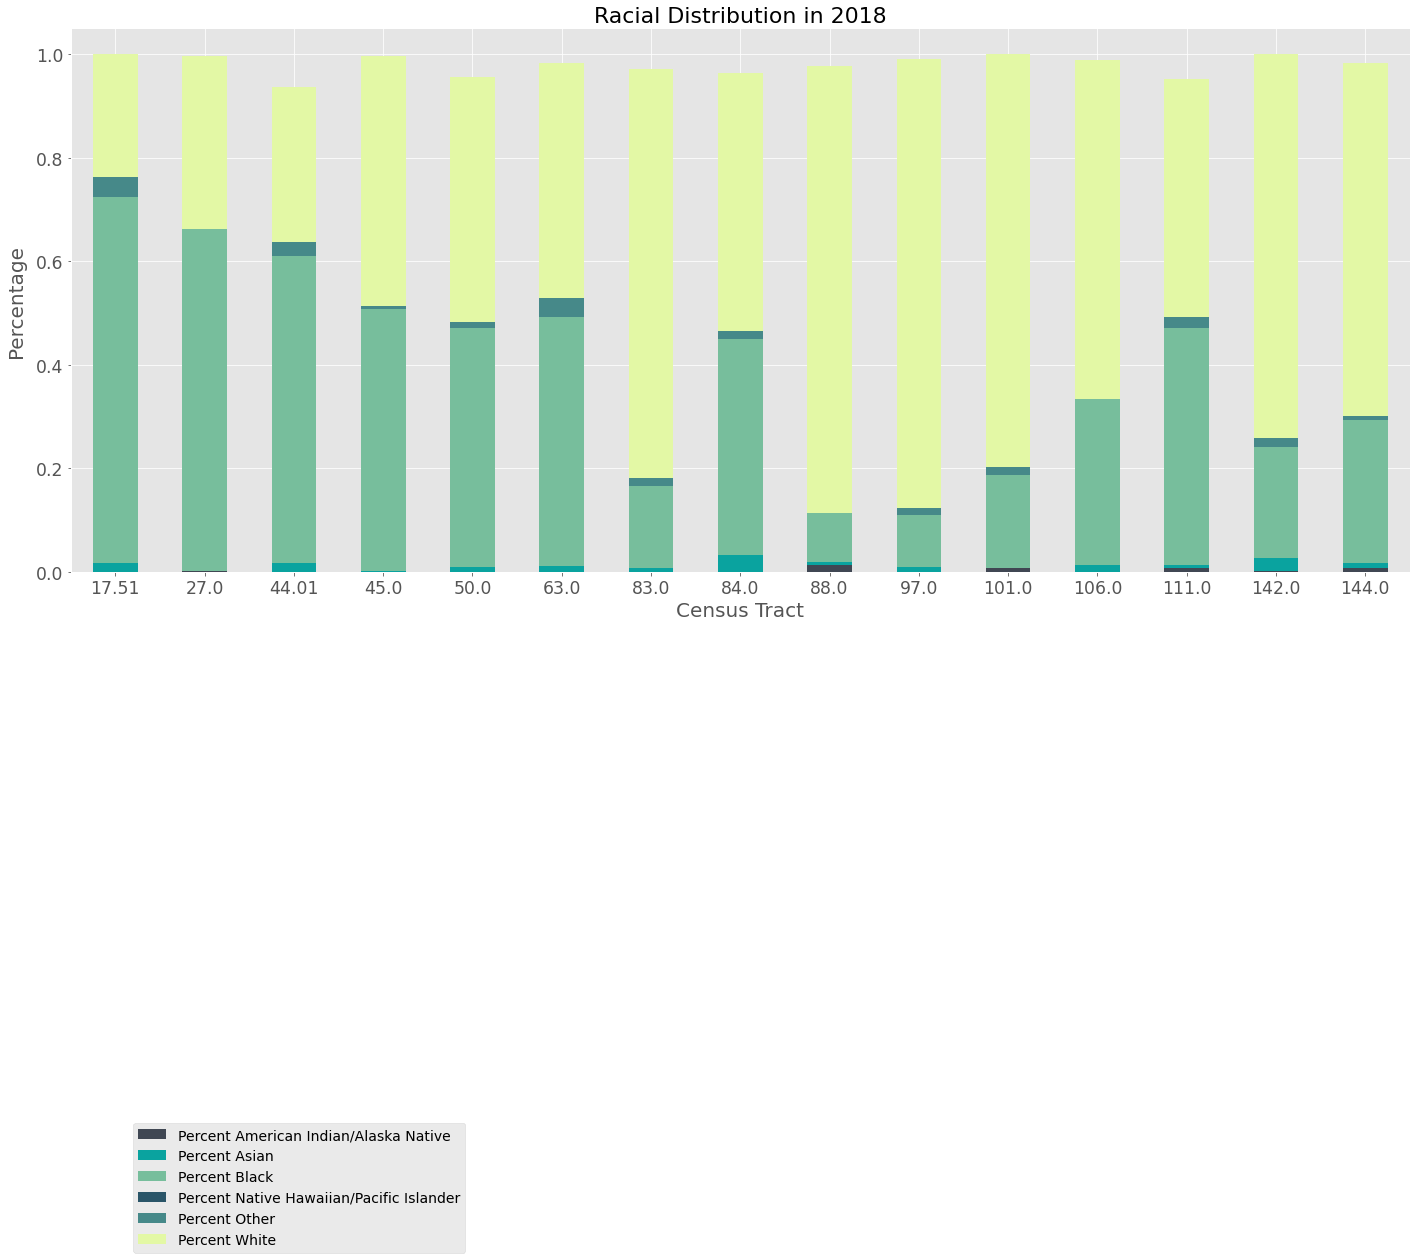

In [5]:
#Changing what I did before to take in census tract data: highest change in white population
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")


cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)


cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']


#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

change_white = race_pct[['Census Tract']].drop_duplicates()
change_white.set_index('Census Tract', inplace=True)

#Subtract most recent data from old data
change_white['Change in White'] = race_in2018['Percent White'] - race_in2010['Percent White']


#Save the 15 census tracts with the highest increase in population of white people
highest_change = list(change_white['Change in White'].sort_values(ascending=False).head(15).astype(str).to_dict().keys())

most_black = cens_race[cens_race['Year']==2010][['Census Tract', 'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
risky = list(most_black['Census Tract'].to_dict().values())

#subset_2010 = race_in2010.loc[risky]
#subset_2018 = race_in2018.loc[risky]

#Create subsets for each of the years for comparison
subset_2010 = race_in2010.loc[highest_change]
subset_2018 = race_in2018.loc[highest_change]

#-------------------------------------------Plotting--------------------------------------------
'''
#Create pivot tables and plot


subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2010'
                                        ).legend(bbox_to_anchor=(1.2, 1))
subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, fontsize='large',
                                        rot=0, figsize=(20,10), title='Race Distribution in 2018'
                                        ).legend(bbox_to_anchor=(1.2, 1))
'''

theme = [ '#404753', '#0AA39F','#77be9c',  '#2A5568', '#468989','#E3F8A5']

#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(24,10), fontsize='xx-large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='xx-large', rot=0, figsize=(24,10))
ax1.set_title('Racial Distribution in 2010', fontsize=22)
ax1.legend(bbox_to_anchor=(.3, 1.3), fontsize=14)
ax2.set_title('Racial Distribution in 2018', fontsize=22)
ax2.legend(bbox_to_anchor=(.3, -1), fontsize=14)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)




Text(0, 0.5, 'Percentage')

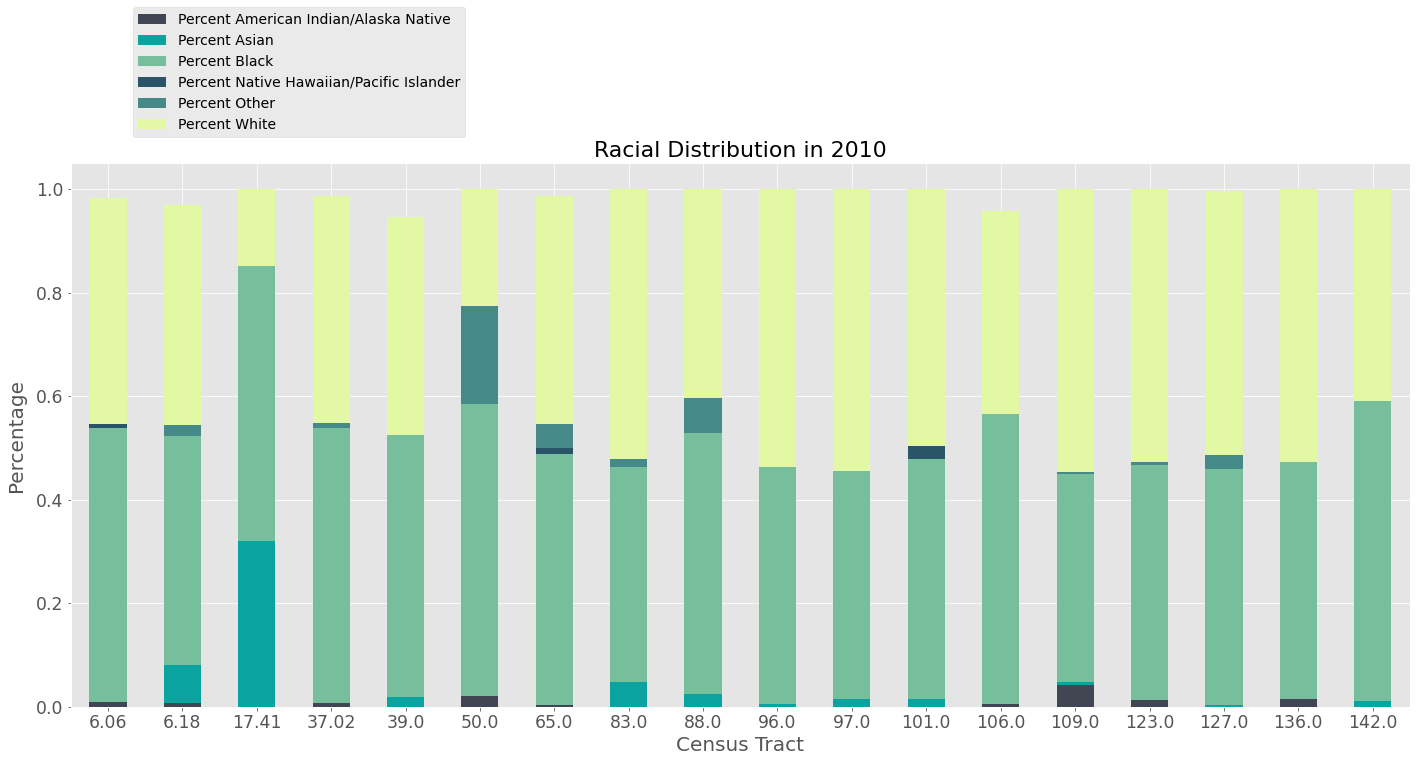

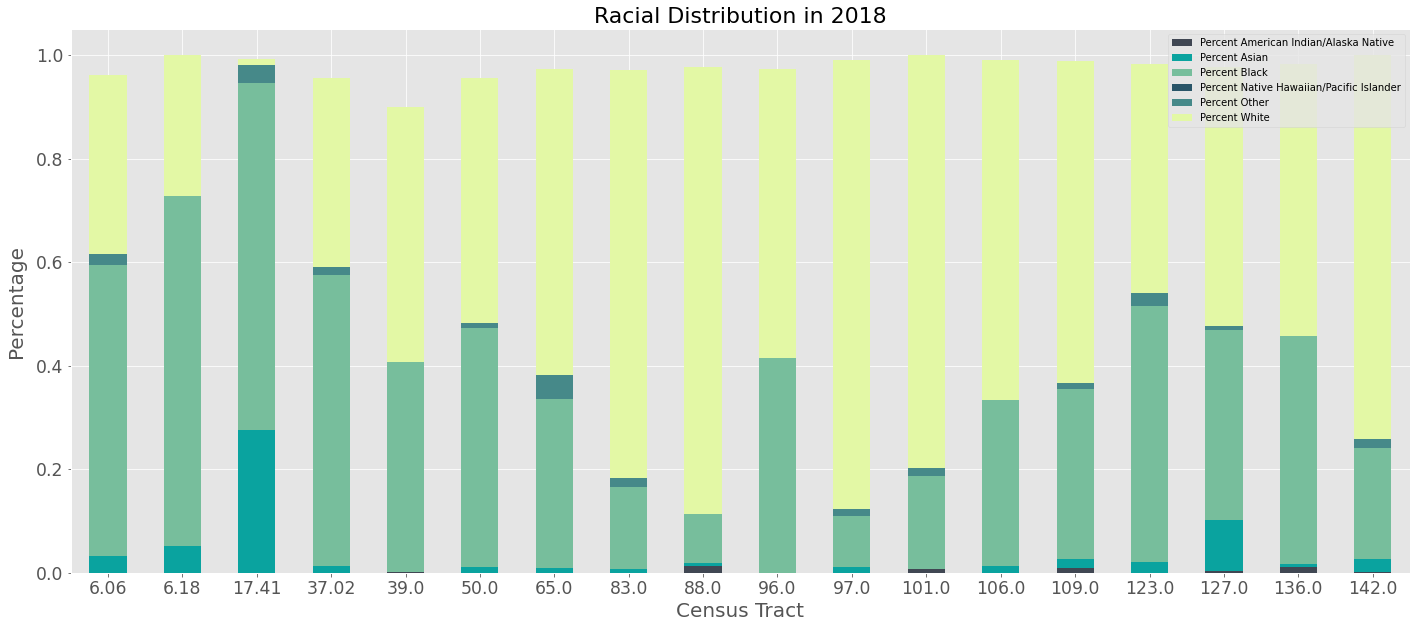

In [6]:
import random as rand
import matplotlib.pyplot as plt
#Changing what I did before to take in census tract data: initial black population between .4 and .6
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")


cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)


cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']

#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

#Create subsets for each of the years for comparison

#theme = ['#468989', '#77be9c', '#E3F8A5', '#404753', '#2A5568', '#0AA39F']
#theme = ['#404753', '#2A5568', '#0AA39F', '#77be9c', '#468989', '#E3F8A5']
#theme = ['#404753', '#2A5568', '#468989', '#0AA39F', '#E3F8A5', '#77be9c']
theme = [ '#404753', '#0AA39F','#77be9c',  '#2A5568', '#468989','#E3F8A5']
#theme=['#0AA39F' ,'#2A5568', '#468989','#77be9c', '#E3F8A5', '#404753' ]

race_in2010.reset_index(inplace=True)
gent_18 = list(race_in2010[(race_in2010['Percent Black']<.6) & (race_in2010['Percent Black']>.4)]['Census Tract'].to_dict().values())
gent_18

race_in2010.set_index('Census Tract', inplace=True)


subset_2010 = race_in2010.loc[gent_18]
subset_2018 = race_in2018.loc[gent_18]

#-------------------------------------------Plotting--------------------------------------------



#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(24,10), fontsize='xx-large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='xx-large', rot=0, figsize=(24,10))
ax1.set_title('Racial Distribution in 2010', fontsize=22)
ax1.legend(bbox_to_anchor=(.3, 1.3), fontsize=14)
ax2.set_title('Racial Distribution in 2018', fontsize=22)
#ax2.legend(bbox_to_anchor=(.3, 1.3), fontsize=14)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)

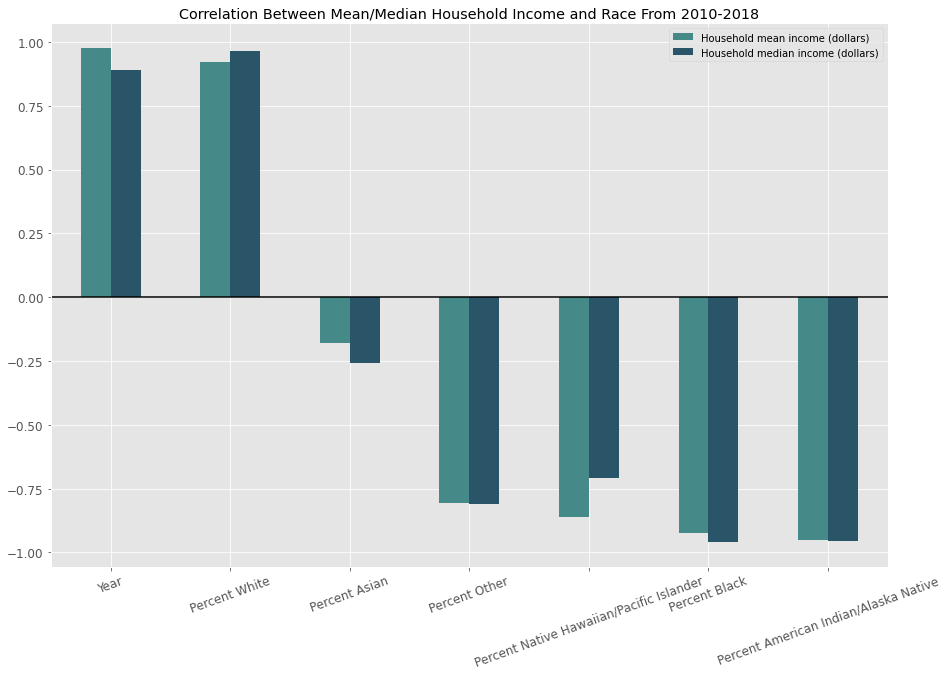

In [7]:
#Converting to census tract data for income correlation

race_forincome = race_pct.drop('Census Tract', axis=1)

cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")

mean_df = cens_income[['Household mean income (dollars)', 'Year']].dropna()
median_df = cens_income[['Household median income (dollars)', 'Year']].dropna()

mean_race = mean_df.merge(race_forincome, on='Year').drop_duplicates()
median_race = median_df.merge(race_forincome, on='Year').drop_duplicates()


pv = mean_race.pivot_table(index='Year', values=(cols+['Household mean income (dollars)']), aggfunc=np.mean)
mean_race = pd.DataFrame(pv.to_records())
plotter = mean_race.corr()['Household mean income (dollars)']
plotter.drop('Household mean income (dollars)', inplace=True)

pv2 = median_race.pivot_table(index='Year', values=(cols+['Household median income (dollars)']), aggfunc=np.mean)
median_race = pd.DataFrame(pv2.to_records())
plotter2 = median_race.corr()['Household median income (dollars)']
plotter2.drop('Household median income (dollars)', inplace=True)

order = list(plotter.sort_values(ascending=False).index)
plotter = pd.concat([plotter, plotter2], axis=1)
plotter.reindex(order).plot.bar(
                    title='Correlation Between Mean/Median Household Income and Race From 2010-2018', 
                    figsize=(15,10), fontsize='large', rot=20,
    color=['#468989','#2A5568']).axhline(y=0, color='black')

Text(0, 0.5, 'Change in Percentage of White Residents between 2010-2018')

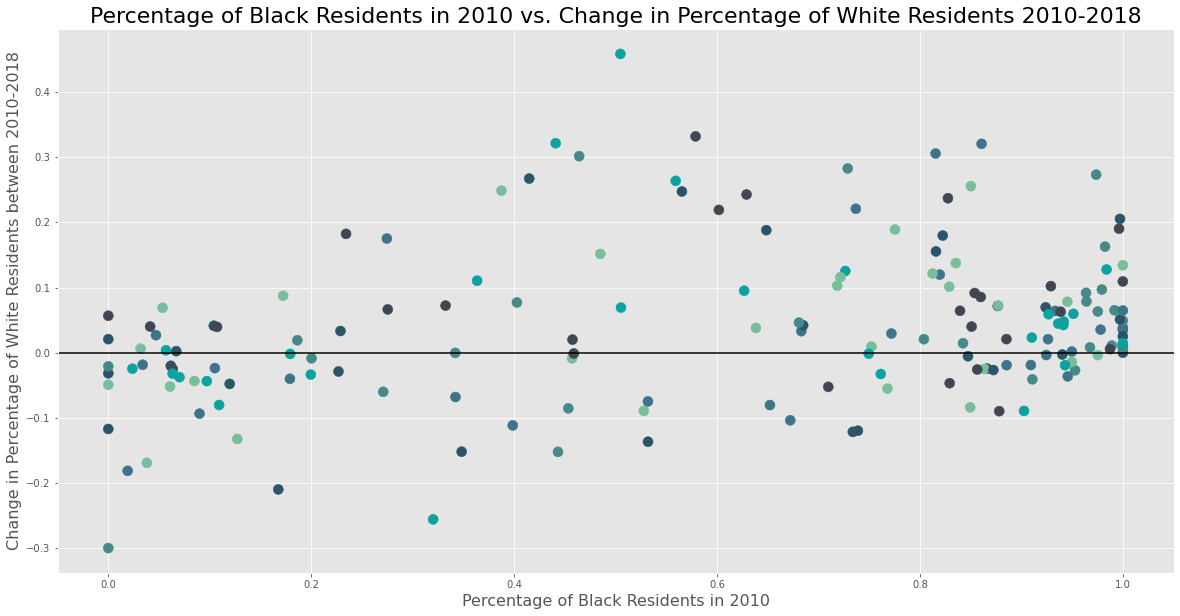

In [8]:
import matplotlib.pyplot as plt

colors = ['#3F738A', '#404753', '#0AA39F','#77be9c',  '#2A5568', '#468989']
change_white['Percent Black 2010'] = race_in2010['Percent Black']
change_white.plot.scatter(x='Percent Black 2010', y='Change in White', figsize=(20,10), c=colors*29,
                               s=100).axhline(y=0, color='black')
plt.title('Percentage of Black Residents in 2010 vs. Change in Percentage of White Residents 2010-2018',
         fontsize=22)
plt.xlabel('Percentage of Black Residents in 2010', fontsize=16)
plt.ylabel('Change in Percentage of White Residents between 2010-2018', fontsize=16)

Text(0, 0.5, 'Percentage')

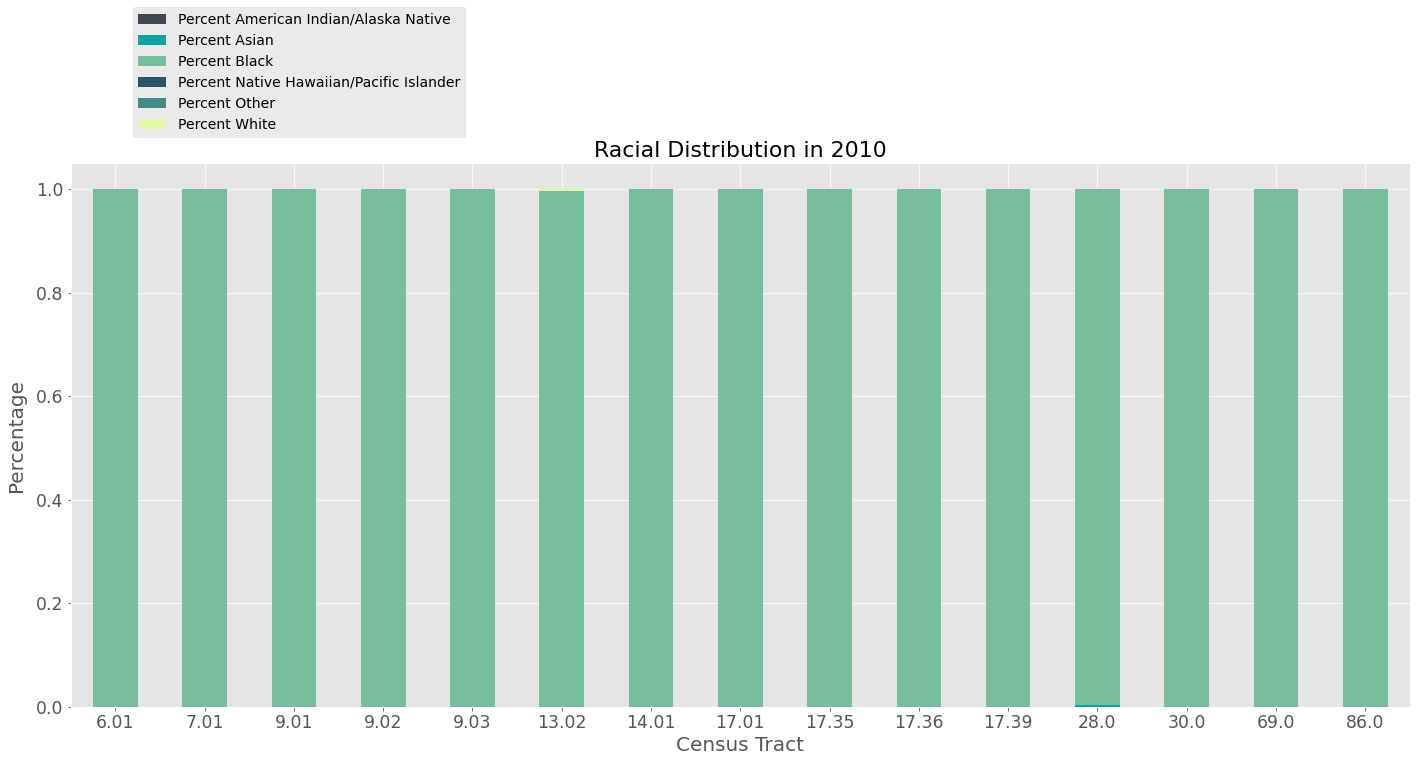

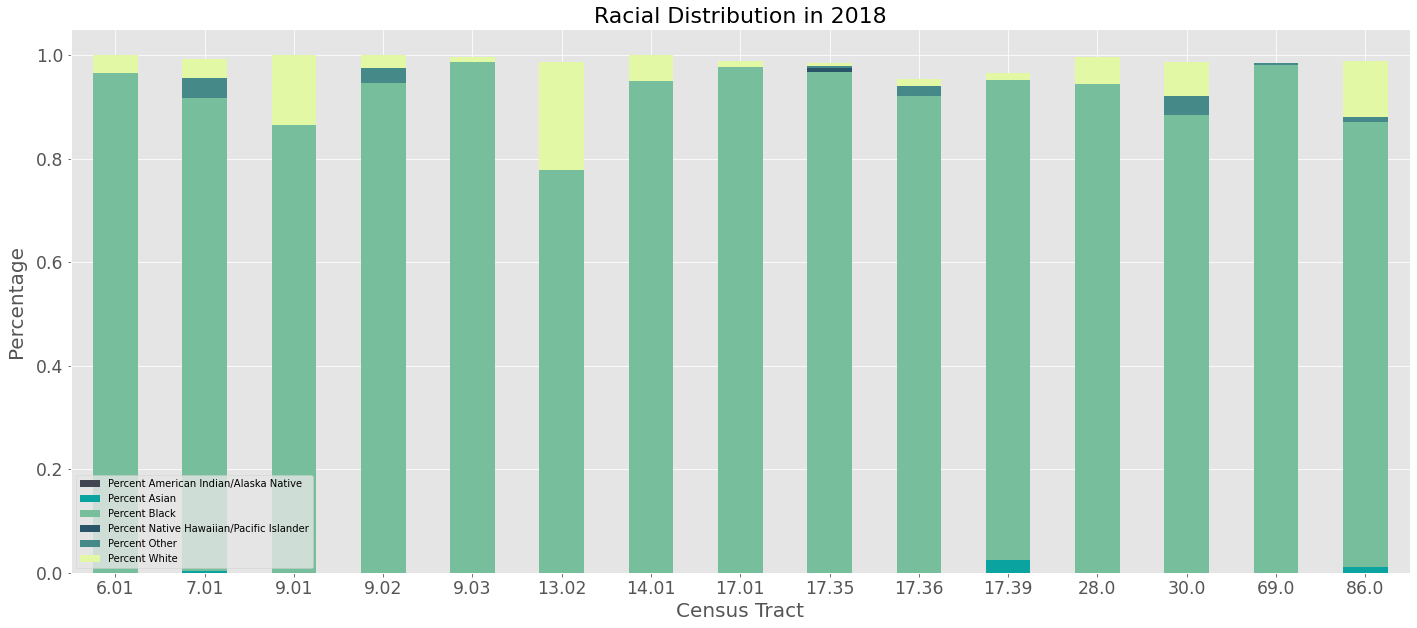

In [9]:
#Changing what I did before to take in census tract data: initial hypothesis
cens_income = pd.read_csv("./Data/cleaned_income_data.csv")
cens_race = pd.read_csv("./Data/cleaned_race_data.csv")


cens_race['Percent White'] = cens_race["White"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Black'] = cens_race["Black"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent American Indian/Alaska Native'] = cens_race["American Indian and Alask Native"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Asian'] = cens_race["Asian"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Native Hawaiian/Pacific Islander'] = cens_race["Native Hawaiian and Other Pacific Islander"].astype(float) / cens_race['Total Population'].astype(float)
cens_race['Percent Other'] = cens_race["Other"].astype(float) / cens_race['Total Population'].astype(float)
race_pct = cens_race[['Census Tract', 'Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other', 'Year']].drop_duplicates()
race_pct.dropna(inplace=True)


cols = ['Percent White', 'Percent Black', 'Percent American Indian/Alaska Native', 'Percent Asian', 'Percent Native Hawaiian/Pacific Islander', 'Percent Other']


#Make Datasets in 2010 and 2018 to calculate change:
race_in2010 = race_pct[race_pct['Year']==2010]
race_in2018 = race_pct[race_pct['Year']==2018]

race_in2010.set_index('Census Tract', inplace=True)
race_in2018.set_index('Census Tract', inplace=True)

#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

change_white = race_pct[['Census Tract']].drop_duplicates()
change_white.set_index('Census Tract', inplace=True)

#Subtract most recent data from old data
change_white['Change in White'] = race_in2018['Percent White'] - race_in2010['Percent White']


#Save the 15 census tracts with the highest increase in population of white people
highest_change = list(change_white['Change in White'].sort_values(ascending=False).head(15).astype(str).to_dict().keys())

most_black = cens_race[cens_race['Year']==2010][['Census Tract', 'Percent Black']].sort_values(by='Percent Black',ascending=False).head(15)
risky = list(most_black['Census Tract'].to_dict().values())

subset_2010 = race_in2010.loc[risky]
subset_2018 = race_in2018.loc[risky]

#-------------------------------------------Plotting--------------------------------------------

#Create pivot tables and plot
ax1 = subset_2010.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    rot=0, figsize=(24,10), fontsize='xx-large')
ax2 = subset_2018.pivot_table(index='Census Tract', values=cols).plot.bar(stacked=True, color=theme, 
                                    fontsize='xx-large', rot=0, figsize=(24,10))
ax1.set_title('Racial Distribution in 2010', fontsize=22)
ax1.legend(bbox_to_anchor=(.3, 1.3), fontsize=14)
ax2.set_title('Racial Distribution in 2018', fontsize=22)
#ax2.legend(bbox_to_anchor=(.3, -1), fontsize=14)
ax1.set_xlabel('Census Tract', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=20, labelpad=10)
ax2.set_xlabel('Census Tract', fontsize=20)
ax2.set_ylabel('Percentage', fontsize=20, labelpad=10)



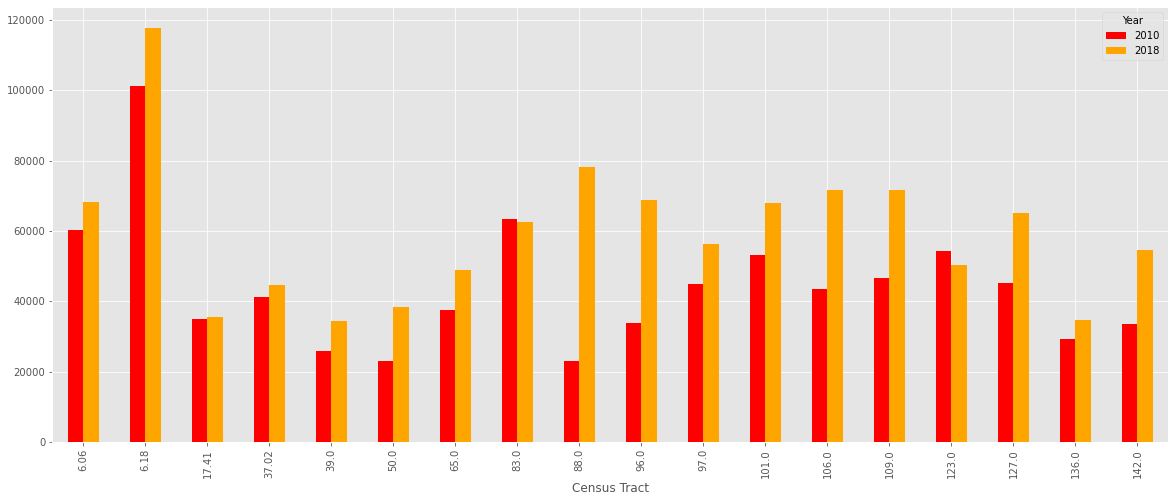

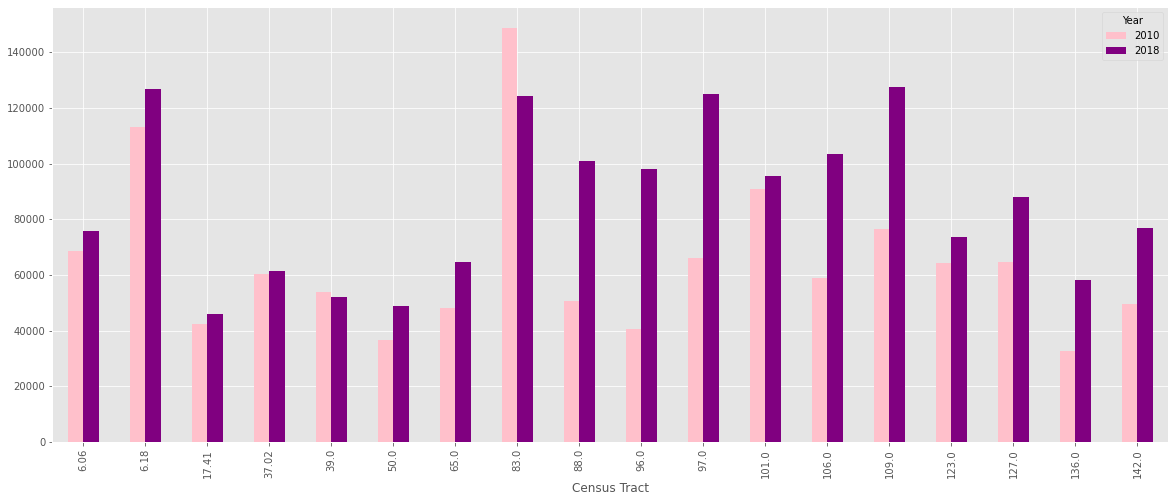

In [10]:
revised_hyp = cens_income[['Census Tract','Household median income (dollars)', 'Household mean income (dollars)', 'Year']]

revised_hyp = revised_hyp.set_index('Census Tract')
revised_hyp = revised_hyp.loc[gent_18]
inc_change = revised_hyp[(revised_hyp.Year==2010) | (revised_hyp.Year==2018)]
#inc_change[inc_change['Census Tract'] in gent_18]
inc_change.reset_index(inplace=True)
#inc_change.pivot_table(index=['Census Tract', 'Year'], values=['Household median income (dollars)', 'Household mean income (dollars)']).plot.bar(figsize=(20,8))

inc_change.pivot_table(index='Census Tract', 
                       columns='Year', values='Household median income (dollars)'
                              ).plot.bar(figsize=(20,8), color=['red', 'orange'])


inc_change.pivot_table(index='Census Tract', 
                       columns='Year', values='Household mean income (dollars)'
                              ).plot.bar(figsize=(20,8), color=['pink', 'purple'])




In [11]:
#Back to neighborhood data

#older cleaning

xls = pd.ExcelFile("./Data/Neighborhood profiles data tables.xlsx")

population = pd.read_excel(xls, "Table 1", skiprows = 11)
population.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", "MOE.1", 
                           "2000.1", "2000.2", "2014-2018.1", "2014-2018.2"], inplace=True)
population.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Population in 2000",
    "2014-2018" : "Population in  2014-2018"
    }, inplace = True)
population.dropna(inplace=True)

race_df = pd.read_excel(xls, "Table 4", skiprows = 11)
race_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", "Unnamed: 16", "Unnamed: 20", 
                        "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", "MOE.6", 
                        "2000.4", "2014-2018.4"], inplace=True)
race_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Black in 2000", 
    "2014-2018" : "Percent Black in 2014-2018",
    "2000.1" : "Percent White in 2000", 
    "2014-2018.1" : "Percent White in 2014-2018",
    "2000.2" : "Percent Asian in 2000", 
    "2014-2018.2" : "Percent Asian in 2014-2018",
    "2000.3" : "Percent American Indian in 2000", 
    "2014-2018.3" : "Percent American Indian in 2014-2018",
    "2000.5" : "Percent Hispanic in 2000", 
    "2013-2017" : "Percent Hispanic in 2013-2017",
    "2000.6" : "Percent Other in 2000", 
    "2013-2017.1" : "Percent Other in 2013-2017"
    }, inplace = True)

race_df = race_df.replace('NaN%', 0)
race_df.dropna(inplace=True)
race_df["Percent Black in 2014-2018"] = race_df["Percent Black in 2014-2018"].astype(float)
race_df["Percent White in 2014-2018"] = race_df["Percent White in 2014-2018"].astype(float)
race_df["Percent Asian in 2014-2018"] = race_df["Percent Asian in 2014-2018"].astype(float)
race_df["Percent American Indian in 2014-2018"] = \
                        race_df["Percent American Indian in 2014-2018"].astype(float)
race_df["Percent Hispanic in 2013-2017"] = race_df["Percent Hispanic in 2013-2017"].astype(float)
race_df["Percent Other in 2013-2017"] = race_df["Percent Other in 2013-2017"].astype(float)

#Cleaning Occupancy Data
occup_df = pd.read_excel(xls, "Table 8", skiprows = 11)
occup_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "MOE", "MOE.1", "MOE.2"], inplace=True)
occup_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Total Housing Units in 2000", 
    "2014-2018" : "Total Housing Units in 2014-2018",
    "2000.1" : "Percent Occupancy in 2000", 
    "2014-2018.1" : "Percent Occupancy in 2014-2018",
    "2000.2" : "Percent Vacancy in 2000", 
    "2014-2018.2" : "Percent Vacancy in 2014-2018"
    }, inplace = True)

#Cleaning Occupancy Data by RENTER/OWNER
rent_own_df = pd.read_excel(xls, "Table 9", skiprows = 11)
rent_own_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "MOE", "MOE.1", "MOE.2"], inplace=True)
rent_own_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Total Occupied Housing Units in 2000", 
    "2014-2018" : "Total Occupied Housing Units in 2014-2018",
    "2000.1" : "Percent Owner Occupied in 2000", 
    "2014-2018.1" : "Percent Owner Occupied in 2014-2018",
    "2000.2" : "Percent Renter Occupied in 2000", 
    "2014-2018.2" : "Percent Renter Occupied in 2014-2018"
    }, inplace = True)

#Cleaning average rent data
avg_rent_df = pd.read_excel(xls, "Table 11", skiprows = 11)
avg_rent_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
avg_rent_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018" : "Avg Contract Rent in 2014-2018",
    "2014-2018.1" : "Avg Gross Rent in 2014-2018"
    }, inplace = True)

#Cleaning average household income data
avg_income_df = pd.read_excel(xls, "Table 14", skiprows = 11)
avg_income_df.drop(columns='MOE', inplace=True)
avg_income_df.rename(columns = {'Unnamed: 0':'Neighborhood', 2000 : "Avg Household Income in 2000", 
    "2014-2018" : "Avg Household Income in 2014-2018"}, inplace=True)

#Cleaning income distribution data
inc_dist_df = pd.read_excel(xls, "Table 15", skiprows = 11)
inc_dist_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
                            "Unnamed: 16", "Unnamed: 20", "Unnamed: 24","Unnamed: 28", "Unnamed: 32", 
                            "Unnamed: 36", "Unnamed: 40", "Unnamed: 44", "Unnamed: 48", "Unnamed: 52",
                            "Unnamed: 56", "Unnamed: 60", 
                            "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", 
                            "MOE.6", "MOE.7", "MOE.8", "MOE.9", "MOE.10",
                            "MOE.11", "MOE.12", "MOE.13", "MOE.14", "MOE.15"], inplace=True)

inc_dist_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Income Under $10K in 2000", 
    "2000.1" : "Percent Income $10K-$15K in 2000",
    "2000.2" : "Percent Income $15K-$20K in 2000",
    "2000.3" : "Percent Income $20K-$25K in 2000",
    "2000.4" : "Percent Income $25K-$30K in 2000",
    "2000.5" : "Percent Income $30K-$35K in 2000",
    "2000.6" : "Percent Income $35K-$40K in 2000",
    "2000.7" : "Percent Income $40K-$45K in 2000",
    "2000.8" : "Percent Income $45K-$50K in 2000",
    "2000.9" : "Percent Income $50K-$60K in 2000",
    "2000.10" : "Percent Income $60K-$75K in 2000",
    "2000.11" : "Percent Income $75K-$100K in 2000",
    "2000.12" : "Percent Income $100K-$125K in 2000",
    "2000.13" : "Percent Income $125K-$150K in 2000",
    "2000.14" : "Percent Income $150K-$200K in 2000",
    "2000.15" : "Percent Income $200K+ in 2000",
    "2014-2018" : "Percent Income Under $10K in 2014-2018", 
    "2014-2018.1" : "Percent Income $10K-$15K in 2014-2018",
    "2014-2018.2" : "Percent Income $15K-$20K in 2014-2018",
    "2014-2018.3" : "Percent Income $20K-$25K in 2014-2018",
    "2014-2018.4" : "Percent Income $25K-$30K in 2014-2018",
    "2014-2018.5" : "Percent Income $30K-$35K in 2014-2018",
    "2014-2018.6" : "Percent Income $35K-$40K in 2014-2018",
    "2014-2018.7" : "Percent Income $40K-$45K in 2014-2018",
    "2014-2018.8" : "Percent Income $45K-$50K in 2014-2018",
    "2014-2018.9" : "Percent Income $50K-$60K in 2014-2018",
    "2014-2018.10" : "Percent Income $60K-$75K in 2014-2018",
    "2014-2018.11" : "Percent Income $75K-$100K in 2014-2018",
    "2014-2018.12" : "Percent Income $100K-$125K in 2014-2018",
    "2014-2018.13" : "Percent Income $125K-$150K in 2014-2018",
    "2014-2018.14" : "Percent Income $150K-$200K in 2014-2018",
    "2014-2018.15" : "Percent Income $200K+ in 2014-2018",
    }, inplace = True)

# Cleaning percent of income spent on housing data
inc_on_housing_df = pd.read_excel(xls, "Table 12", skiprows = 11)
inc_on_housing_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1", '2014-2018.1'], inplace=True)
inc_on_housing_df.rename(columns = { "Unnamed: 0" : "Neighborhood", 
                                    "2014-2018" : "Percent of Income Paid on Housing in 2014-2018",},
                         inplace = True)

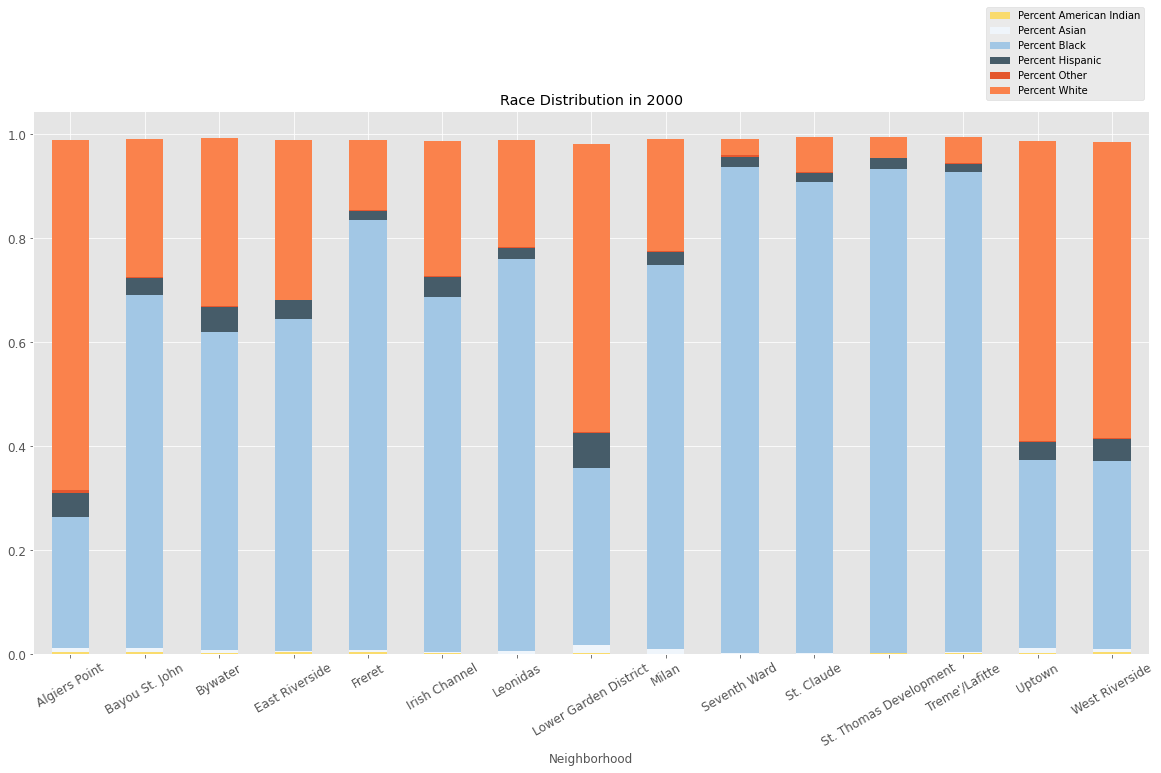

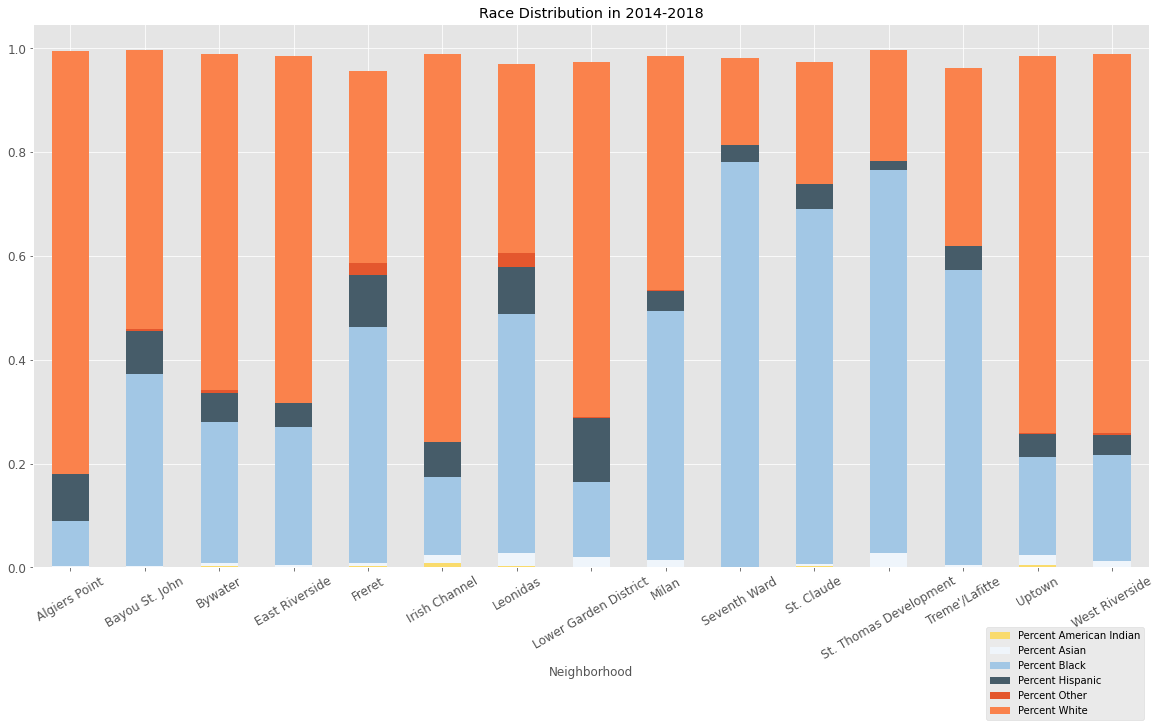

In [12]:
import random as rand
#New column names:
cols = ['Percent Black', 'Percent White', 'Percent Asian', 'Percent American Indian', 
        'Percent Hispanic', 'Percent Other']

#Extract all column names ending in "2000"
race_in2000 = race_df.filter(regex='2000$',axis=1)
race_in2000.columns = cols
race_in2000['Neighborhood'] = race_df['Neighborhood']
race_in2000['Year'] = '2000'


#Extract all column names ending in "201_"
race_in2018 = race_df.filter(regex='201.$',axis=1)
race_in2018.columns = cols
race_in2018['Neighborhood'] = race_df['Neighborhood']
race_in2018['Year'] = '2014-2018'

#combine the two dfs
race_by_year = pd.concat([race_in2000, race_in2018])


#Calculate which neighborhoods had the biggest influx of white people between the two time periods:

#Subtract most recent data from old data
race_by_year['Change in White'] = race_in2018['Percent White'] - race_in2000['Percent White']

#Sort values ascendingly and save indexes of the first 10 values
# **Note: head is set to 20 because there are duplicate values
idxs = list(race_by_year['Change in White'].sort_values(ascending=False).head(30).to_dict().keys())

#Save the 10 neighborhoods with the highest increase in population of white people
highest_change = race_by_year.iloc[idxs]['Neighborhood'].tolist()

order = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 
         'Percent American Indian', 'Percent Other']

#Create subsets for each of the years for comparison
subset_2000 = race_in2000[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')
subset_2018 = race_in2018[race_df.Neighborhood.isin(highest_change)].sort_values(by='Percent White')

theme2 = ['#f9db6d', '#eff5fb', '#a2c7e5', '#465c69', '#e4572e', '#fa824c']
#['#e4572e', '#f9db6d', '#fa824c', '#465c69', '#eff5fb', '#a2c7e5']

#Create pivot tables and plot
subset_2000.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                                        rot=30, figsize=(20,10), color=theme2, title='Race Distribution in 2000'
                                        ).legend(bbox_to_anchor=(1, 1.2))
subset_2018.pivot_table(index='Neighborhood', values=order).plot.bar(stacked=True, fontsize='large',
                                        rot=30, figsize=(20,10), color=theme2, title='Race Distribution in 2014-2018'
                                        ).legend(bbox_to_anchor=(1, -.1))




In [13]:
#Cleaning related datasets to measure gentrification:


inc_dist = inc_dist_df
dists = ['Percent Income Under $10K in 2000',
       'Percent Income Under $10K in 2014-2018',
         'Percent Income $10K-$35K in 2000',
         'Percent Income $10K-$35K in 2014-2018',
         'Percent Income $35K-$60K in 2000',
         'Percent Income $35K-$60K in 2014-2018',
         'Percent Income $60K-$100K in 2000',
         'Percent Income $60K-$100K in 2014-2018',
         'Percent Income $100K-$200K in 2000',
         'Percent Income $100K-$200K in 2014-2018',
         'Percent Income $200K+ in 2000', 'Percent Income $200K+ in 2014-2018']
inc_dist['Percent Income $10K-$35K in 2000'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2000'] +
    inc_dist[ 'Percent Income $15K-$20K in 2000'] + 
    inc_dist['Percent Income $20K-$25K in 2000'] + 
    inc_dist['Percent Income $25K-$30K in 2000']+
    inc_dist['Percent Income $30K-$35K in 2000'])
inc_dist['Percent Income $35K-$60K in 2000'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2000'] +
    inc_dist[ 'Percent Income $40K-$45K in 2000'] + 
    inc_dist['Percent Income $45K-$50K in 2000'] + 
    inc_dist['Percent Income $50K-$60K in 2000'])
inc_dist['Percent Income $60K-$100K in 2000'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2000'] +
    inc_dist[ 'Percent Income $75K-$100K in 2000'])
inc_dist['Percent Income $100K-$200K in 2000']= (
    inc_dist[ 'Percent Income $100K-$125K in 2000'] +
    inc_dist[ 'Percent Income $125K-$150K in 2000'] + 
    inc_dist['Percent Income $150K-$200K in 2000'])

inc_dist['Percent Income $10K-$35K in 2014-2018'] = (
    inc_dist[ 'Percent Income $10K-$15K in 2014-2018'] +
    inc_dist[ 'Percent Income $15K-$20K in 2014-2018'] + 
    inc_dist['Percent Income $20K-$25K in 2014-2018'] + 
    inc_dist['Percent Income $25K-$30K in 2014-2018']+
    inc_dist['Percent Income $30K-$35K in 2014-2018'])
inc_dist['Percent Income $35K-$60K in 2014-2018'] = (
    inc_dist[ 'Percent Income $35K-$40K in 2014-2018'] +
    inc_dist[ 'Percent Income $40K-$45K in 2014-2018'] + 
    inc_dist['Percent Income $45K-$50K in 2014-2018'] + 
    inc_dist['Percent Income $50K-$60K in 2014-2018'])
inc_dist['Percent Income $60K-$100K in 2014-2018'] = (
    inc_dist[ 'Percent Income $60K-$75K in 2014-2018'] +
    inc_dist[ 'Percent Income $75K-$100K in 2014-2018'])
inc_dist['Percent Income $100K-$200K in 2014-2018']= (
    inc_dist[ 'Percent Income $100K-$125K in 2014-2018'] +
    inc_dist[ 'Percent Income $125K-$150K in 2014-2018'] + 
    inc_dist['Percent Income $150K-$200K in 2014-2018'])


household = pd.read_excel(xls, "Table 1", skiprows = 11)
household.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                           2000, "2014-2018"], inplace=True)
household.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Total Households in 2000",
    "2014-2018.1" : "Total Households in  2014-2018",
    "2000.2" : "Family Households in 2000",
    "2014-2018.2" : "Family Households in 2014-2018"
    }, inplace = True)
household.dropna(inplace=True)

pov_df = pd.read_excel(xls, "Table 16", skiprows = 11)
pov_df.drop(columns = ["Unnamed: 4","MOE", "MOE.1"], inplace=True)
pov_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "Num at/above Poverty in 2000",
    "2014-2018.1" : "Num at/above Poverty in 2014-2018",
    2000 : "Num in Poverty in 2000",
    "2014-2018" : "Num in Poverty in 2014-2018"
    }, inplace = True)
pov_df.dropna(inplace=True)

school_df = pd.read_excel(xls, "Table 20", skiprows = 11)
school_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
    "Unnamed: 16", "Unnamed: 20", "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3",
    "MOE.4", "MOE.5", "MOE.6"], inplace=True)

school_df.rename(columns = { 
    2000 : "<9th Grade in 2000",
    "2014-2018" : "<9th Grade in 2014-2018",
    "Unnamed: 0" : "Neighborhood",
    "2000.1" : "9-12th Grade in 2000",
    "2014-2018.1" : "9-12th Grade in 2014-2018",
    "2000.2" : "HS Diploma/GED in 2000",
    "2014-2018.2" : "HS Diploma/GED in 2014-2018",
    "2000.3" : "Some College in 2000",
    "2014-2018.3" : "Some College in 2014-2018",
    "2000.4" : "Associate's in 2000",
    "2014-2018.4" : "Associate's in 2014-2018",
    "2000.5" : "Bachelor's in 2000",
    "2014-2018.5" : "Bachelor's in 2014-2018",
    "2000.6" : "Graduate's and prof. in 2000",
    "2014-2018.6" : "Graduate's and prof. in 2014-2018",
    }, inplace = True)
school_df.dropna(inplace=True)

#school_df[school_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))
school_df_hs = school_df[['Neighborhood', '<9th Grade in 2000', 
        '<9th Grade in 2014-2018',
       '9-12th Grade in 2000', '9-12th Grade in 2014-2018',
       'HS Diploma/GED in 2000', 'HS Diploma/GED in 2014-2018']]

school_df_uni = school_df[['Neighborhood', 'Associate\'s in 2000', 
        'Associate\'s in 2014-2018', 'Bachelor\'s in 2000',
       'Bachelor\'s in 2014-2018', 'Graduate\'s and prof. in 2000',
       'Graduate\'s and prof. in 2014-2018']]

transport = pd.read_excel(xls, "Table 17", skiprows = 11)
transport.drop(columns = ["Unnamed: 4","MOE", "MOE.1", "Unnamed: 8","MOE.2", 
                          ], inplace=True)
transport.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000: "No Vehicle in 2000",
    "2014-2018": "No Vehicle in 2014-2018",
    "2000.1" : "1 Vehicle in 2000",
    "2014-2018.1" : "1 Vehicle in 2014-2018",
    "2000.2" : "2+ Vehicles in 2000",
    "2014-2018.2" : "2+ Vehicles in 2014-2018"
    }, inplace = True)
transport.dropna(inplace=True)
transport[">=1 Vehicle in 2000"] = transport["1 Vehicle in 2000"] + transport["2+ Vehicles in 2000"]
transport[">=1 Vehicle in 2014-2018"] = transport["1 Vehicle in 2014-2018"] + transport["2+ Vehicles in 2014-2018"]

wage = pd.read_excel(xls, "Table 22", skiprows = 11)
wage.drop(columns = [2004,         2017, 'Unnamed: 3','Unnamed: 6','Unnamed: 9'], inplace=True)
wage.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2004.1" : "<=$1,250/month in 2004",
    "2017.1" : "<=$1,250/month in 2017",
    "2004.2" : "$1,251 - $3,333/month in 2004",
    "2017.2" : "$1,251 - $3,333/month in 2017",
    "2004.3" : ">$3,333/month in 2004",
    "2017.3" : ">$3,333/month in 2017",
    }, inplace = True)
wage.dropna(inplace=True)

pct_on_housing = pd.read_excel(xls, "Table 12", skiprows = 11)
pct_on_housing.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
pct_on_housing.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",

    "2014-2018.1" : "Renter occ paying >=30%",

    "2014-2018" : "Owner occ paying >=30%"
    }, inplace = True)
pct_on_housing.dropna(inplace=True)



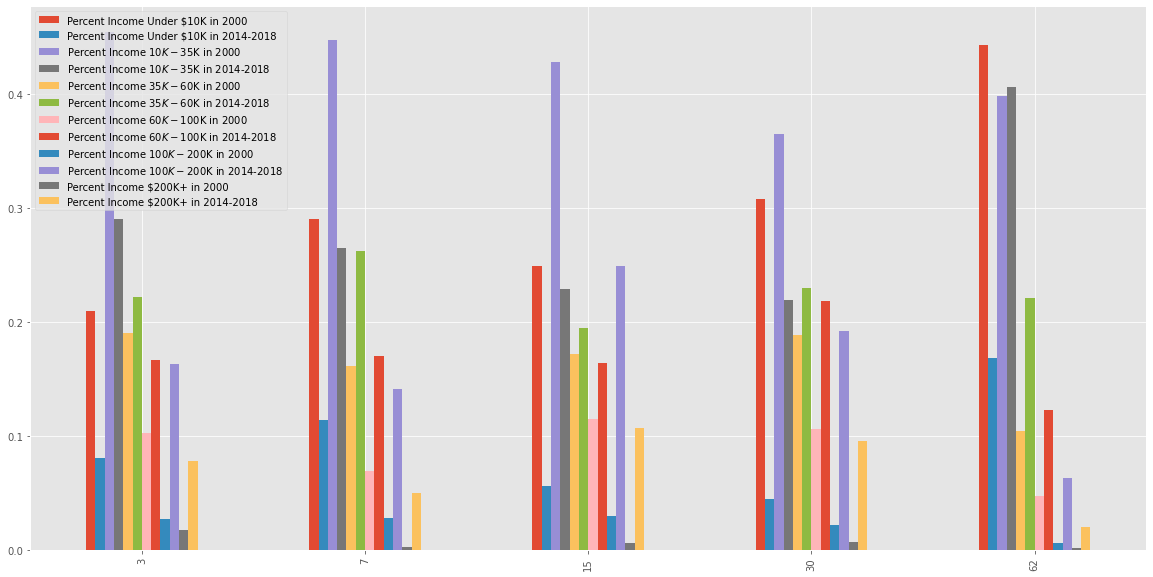

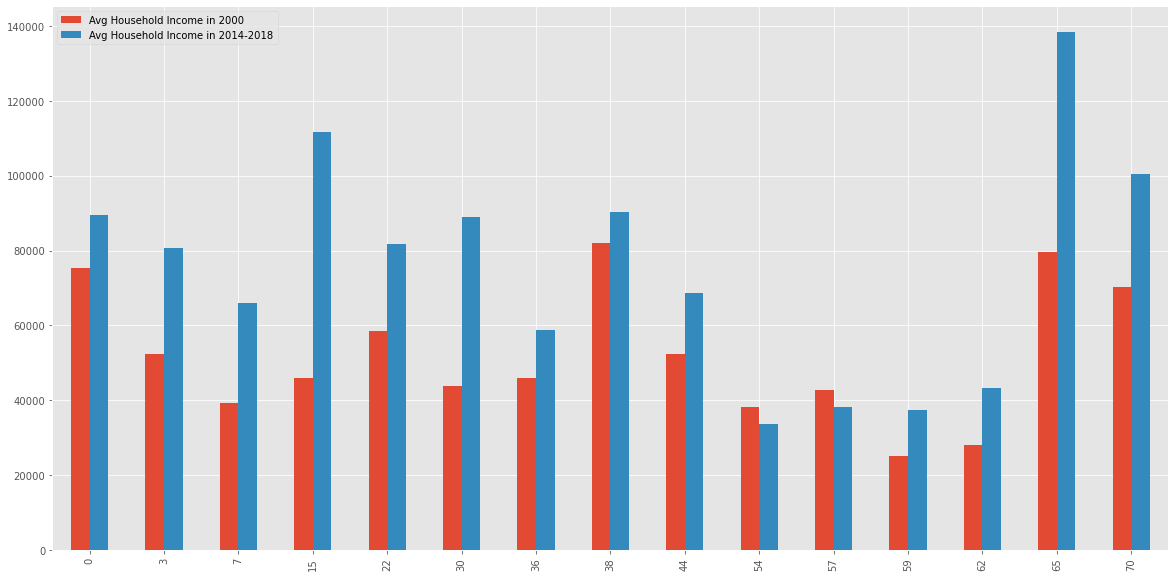

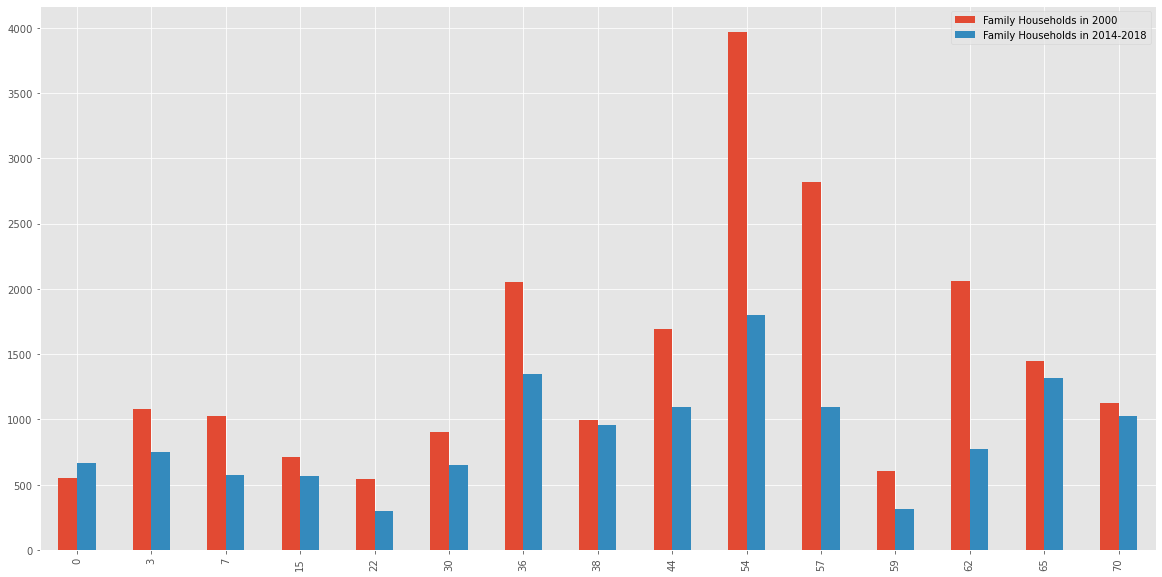

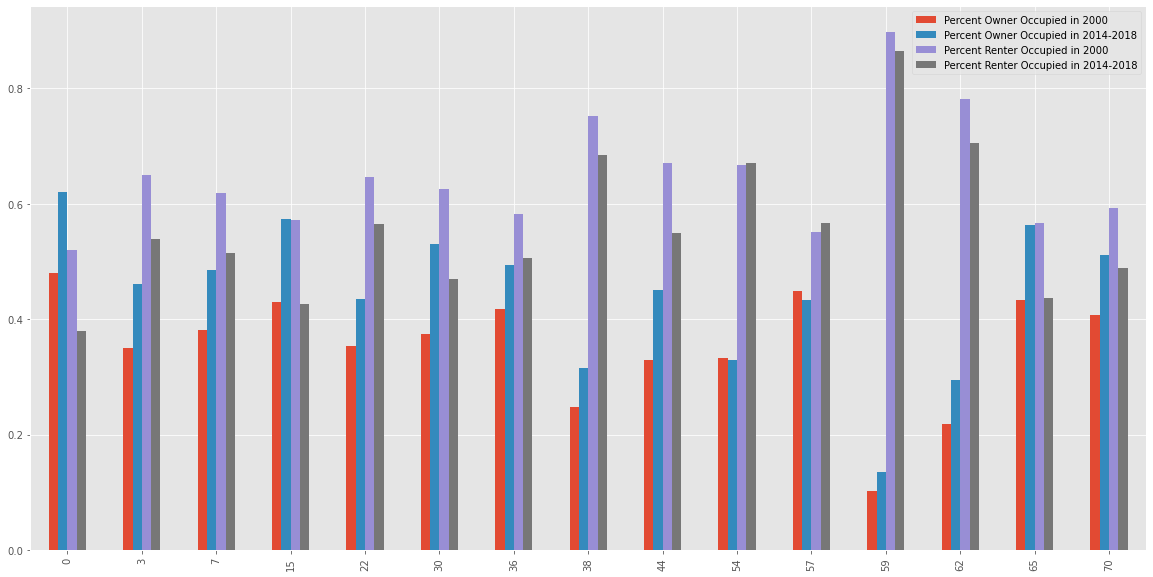

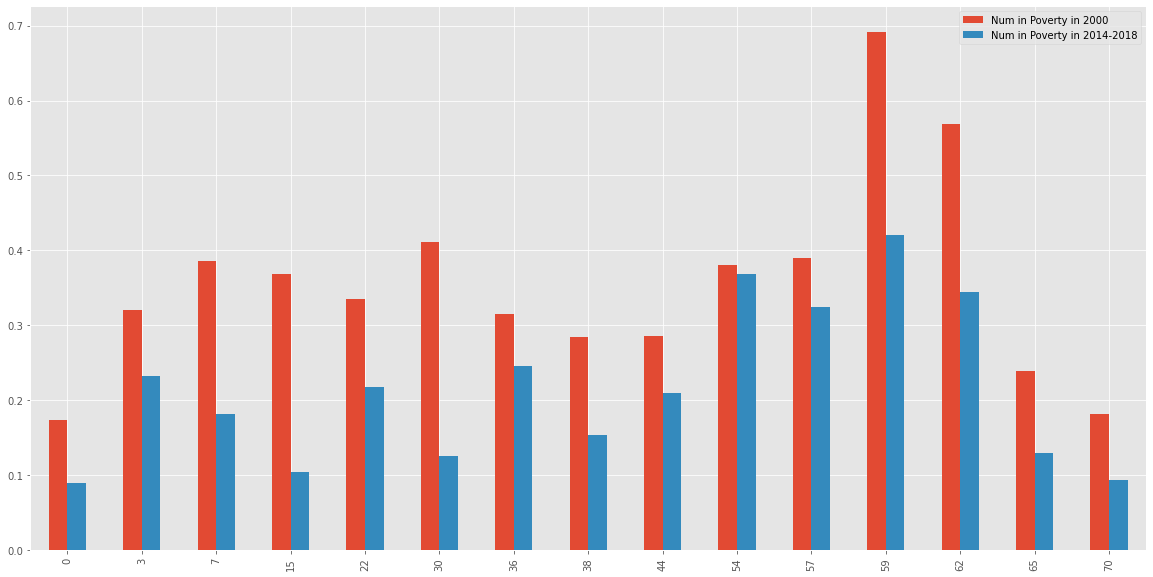

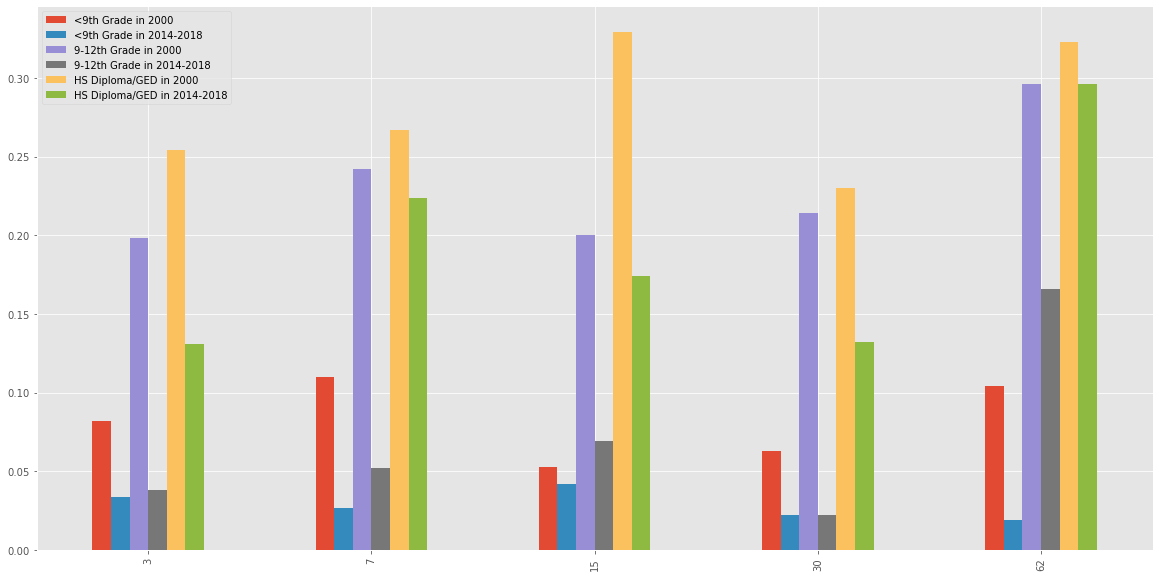

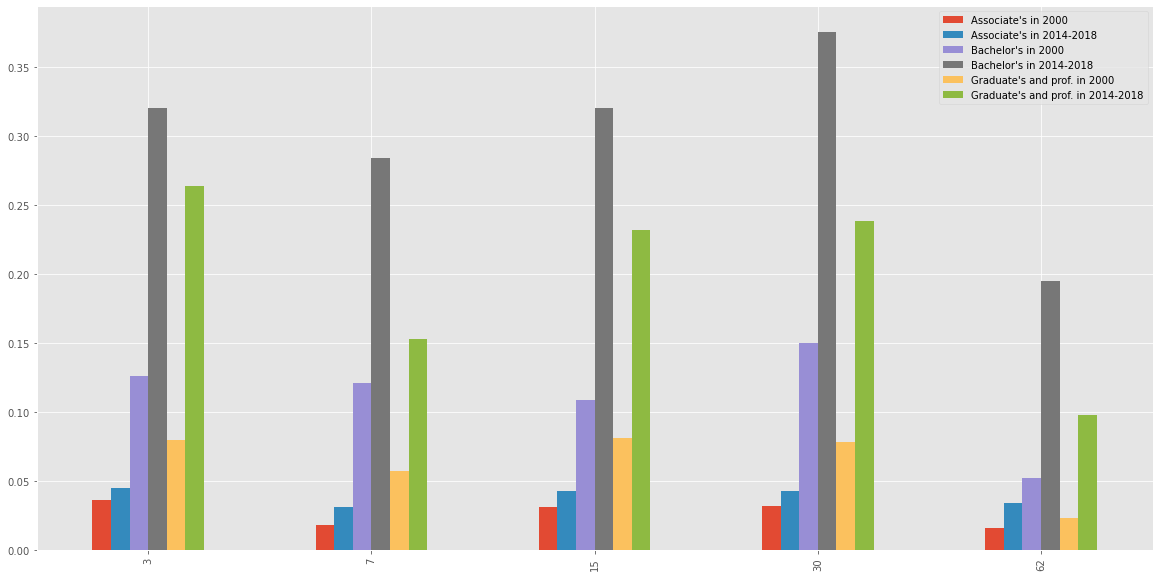

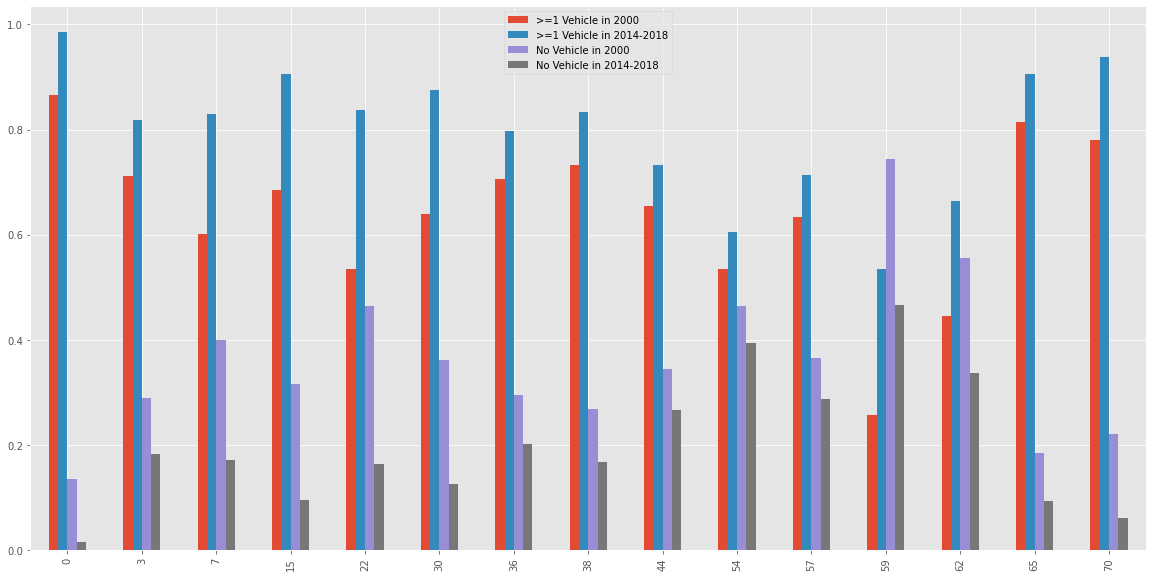

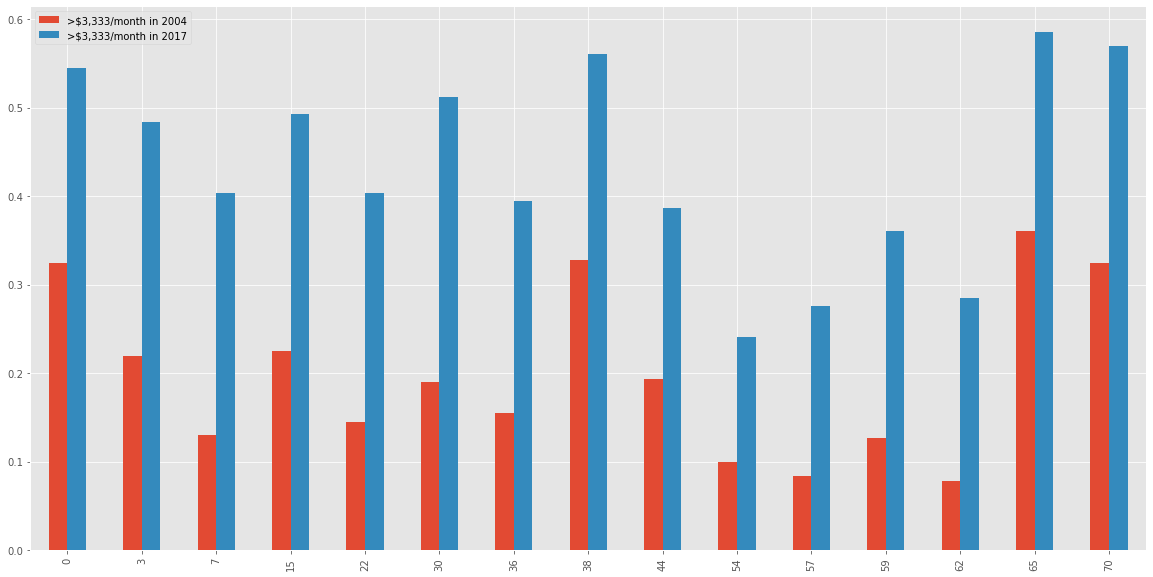

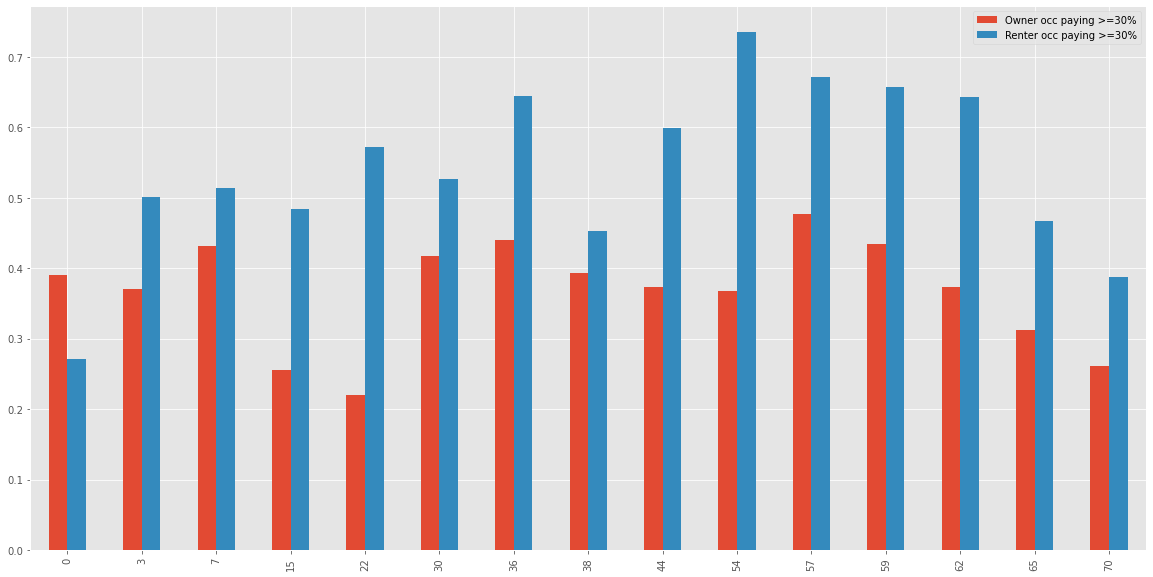

In [14]:
#Plotting these features:

inc_dist[inc_dist_df.Neighborhood.isin(highest_change[:5])][dists].plot.bar(figsize=(20,10))

avg_income_df[avg_income_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))

household[household.Neighborhood.isin(highest_change)][['Neighborhood','Family Households in 2000','Family Households in 2014-2018']].plot.bar(figsize=(20,10))

rent_own_df[rent_own_df.Neighborhood.isin(highest_change)][['Neighborhood',
       'Percent Owner Occupied in 2000', 'Percent Owner Occupied in 2014-2018',
       'Percent Renter Occupied in 2000',
       'Percent Renter Occupied in 2014-2018']].plot.bar(figsize=(20,10))

pov_df[pov_df.Neighborhood.isin(highest_change)][['Neighborhood',
                    "Num in Poverty in 2000", "Num in Poverty in 2014-2018"
                                ]].plot.bar(figsize=(20,10))
school_df_hs[school_df_hs.Neighborhood.isin(highest_change[:5])].plot.bar(figsize=(20,10))
school_df_uni[school_df_uni.Neighborhood.isin(highest_change[:5])].plot.bar(figsize=(20,10))

transport[transport.Neighborhood.isin(highest_change)][['Neighborhood',">=1 Vehicle in 2000",">=1 Vehicle in 2014-2018",
"No Vehicle in 2000", "No Vehicle in 2014-2018"]].plot.bar(figsize=(20,10))

wage[wage.Neighborhood.isin(highest_change)][['Neighborhood', '>$3,333/month in 2004', '>$3,333/month in 2017']].plot.bar(figsize=(20,10))

pct_on_housing[pov_df.Neighborhood.isin(highest_change)].plot.bar(figsize=(20,10))

